In [1]:
%% load data 

T = readtable('Latest20170208.xlsx');


In [ ]:
%% remove subjects HFA reliability is low
rows =  T.FP< .15 & T.FN<.33 & T.FixLoss_pcnt<.2;
% rows =  T.FP< .15 & T.FixLoss_pcnt<.2;


T2 = T(rows,:);

figure; hold on;
subplot(1,2,1)
plot(T2.CSFI,T2.MD30_2,'*r') % n = 575
title 'Good HFA n =572 '  
xlabel CSFI
ylabel MD30-2

subplot(1,2,2)
plot(T.CSFI,T.MD30_2,'*') % n = 661
title 'all subject n=661' 
xlabel CSFI
ylabel MD30-2

In [ ]:
%% NTG vs POAG
Type = char(T2.Type);
rows = zeros(length(T2.Type),1);

% Pick up POAG
for n = 1: length(T2.Type);
 rows(n) = strcmp(T2.Type(n),'POAG');
 rows    = logical(rows);
end

POAG = T2(rows,:);

% pick up NTG
for n = 1: length(T2.Type);
 rows(n) = strcmp(T2.Type(n),'NTG');
 rows    = logical(rows);
end
NTG  =  T2(rows,:);



mdl = 


線形回帰モデル: 
    y ~ 1 + x1

推定された係数: 
                   Estimate      SE        tStat       pValue  
                   ________    _______    _______    __________

    (Intercept)    -0.14564    0.11891    -1.2248       0.22152
    x1              -8.8114    0.44193    -19.938    9.1577e-59


観測数: 335、誤差の自由度: 333
二乗平均平方根誤差: 1.31
決定係数: 0.544、自由度調整済み決定係数 0.543
F 統計量と一定のモデルの比較: 398、p 値は 9.16e-59 です

h =

    1.0000   -0.7377
   -0.7377    1.0000


p =

    1.0000    0.0000
    0.0000    1.0000


mdl = 


線形回帰モデル: 
    y ~ 1 + x1

推定された係数: 
                   Estimate       SE         tStat       pValue  
                   ________    _________    _______    __________

    (Intercept)    0.99079     0.0037199     266.35             0
    x1             -0.1886      0.013825    -13.642    5.7291e-34


観測数: 335、誤差の自由度: 333
二乗平均平方根誤差: 0.0409
決定係数: 0.359、自由度調整済み決定係数 0.357
F 統計量と一定のモデルの比較: 186、p 値は 5.73e-34 です

h =

    1.0000   -0.5988
   -0.5988    1.0000


p =

    1.0000    0.0

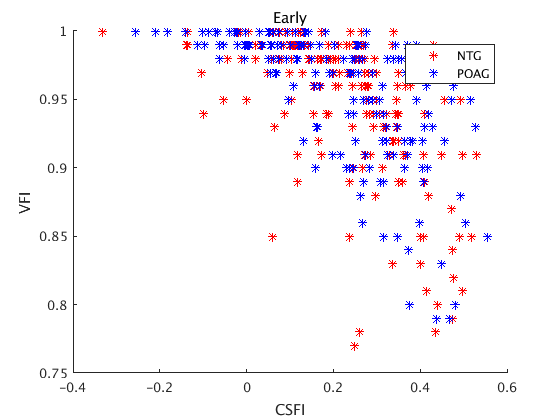

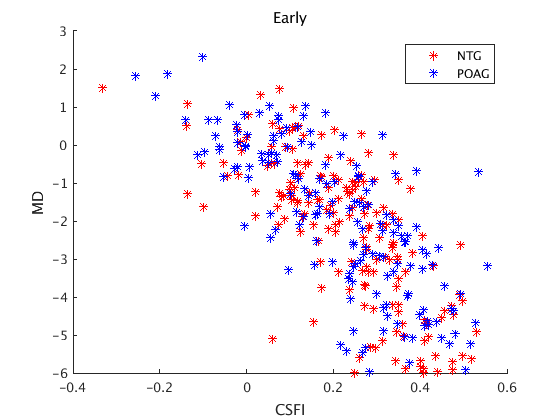

In [26]:
%% staging
inds = T2.MD30_2>-6; 
ninds = NTG.MD30_2>-6;
pinds = POAG.MD30_2>-6;

figure;hold on;

plot(NTG.CSFI(ninds), NTG.MD30_2(ninds),'*r')
plot(POAG.CSFI(pinds),POAG.MD30_2(pinds),'*b')


% plot(x,y,'o','color',[0 0 0])%,'MarkerFaceColor',c(1,:))
% plot(x,y,'*b')%,'MarkerFaceColor',c(1,:))

xlabel CSFI
ylabel MD
title Early
legend({'NTG','POAG'})

% lsline
x = T2.CSFI(inds);
y = T2.MD30_2(inds);
mdl = fitlm(x,y)
[h,p] = corrcoef(x, y)
% title Early


% VFI


figure;hold on;
% plot(x,y,'o','color',[0 0 0])%,'MarkerFaceColor',c(1,:))
plot(NTG.CSFI(ninds), NTG.VFI(ninds),'*r')
plot(POAG.CSFI(pinds),POAG.VFI(pinds),'*b')
xlabel CSFI
ylabel VFI
title Early
legend({'NTG','POAG'})

% title Early
% lsline
x = T2.CSFI(inds);
y = T2.VFI(inds);
mdl = fitlm(x,y)

[h,p] = corrcoef(x, y)



mdl = 


線形回帰モデル: 
    y ~ 1 + x1

推定された係数: 
                   Estimate      SE        tStat       pValue  
                   ________    _______    _______    __________

    (Intercept)    -4.0673     0.91572    -4.4416    2.0501e-05
    x1             -9.3022      1.8382    -5.0606    1.5847e-06


観測数: 118、誤差の自由度: 116
二乗平均平方根誤差: 1.6
決定係数: 0.181、自由度調整済み決定係数 0.174
F 統計量と一定のモデルの比較: 25.6、p 値は 1.58e-06 です

h =

    1.0000   -0.4253
   -0.4253    1.0000


p =

    1.0000    0.0000
    0.0000    1.0000


mdl = 


線形回帰モデル: 
    y ~ 1 + x1

推定された係数: 
                   Estimate       SE        tStat       pValue  
                   ________    ________    _______    __________

    (Intercept)     0.91175    0.048028     18.984    2.2127e-37
    x1             -0.30483    0.096408    -3.1619     0.0020008


観測数: 118、誤差の自由度: 116
二乗平均平方根誤差: 0.0837
決定係数: 0.0793、自由度調整済み決定係数 0.0714
F 統計量と一定のモデルの比較: 10、p 値は 0.002 です

h =

   -0.2817


p =

    0.0020



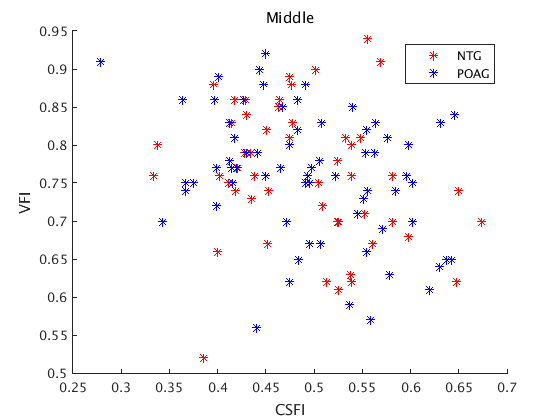

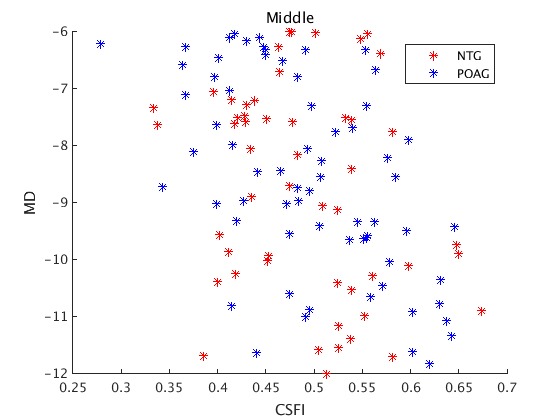

In [27]:
%% stage 2
inds = T2.MD30_2<-6 & T2.MD30_2>=-12 ; 
ninds = NTG.MD30_2<-6 & NTG.MD30_2>=-12 ; 
pinds = POAG.MD30_2<-6 & POAG.MD30_2>=-12 ; 

figure;hold on;

plot(NTG.CSFI(ninds), NTG.MD30_2(ninds),'*r')
plot(POAG.CSFI(pinds),POAG.MD30_2(pinds),'*b')

xlabel CSFI
ylabel MD
title Middle
legend({'NTG','POAG'})


x = T2.CSFI(inds);
y = T2.MD30_2(inds);

mdl = fitlm(x,y)

[h,p] = corrcoef(x, y)


% VFI
y = T2.VFI(inds);

figure; hold on;
plot(NTG.CSFI(ninds), NTG.VFI(ninds),'*r')
plot(POAG.CSFI(pinds),POAG.VFI(pinds),'*b')

xlabel CSFI
ylabel VFI
title Middle
legend({'NTG','POAG'})

% figure;hold on;
% plot(x,y,'o','color',[0 0 0])%,'MarkerFaceColor',c(1,:))
% xlabel CSFI
% ylabel VFI
% 
% title Middle
% lsline

mdl = fitlm(x,y)

[h,p] = corr(x, y)



mdl = 


線形回帰モデル: 
    y ~ 1 + x1

推定された係数: 
                   Estimate      SE       tStat       pValue  
                   ________    ______    _______    __________

    (Intercept)     3.8147     1.5357     2.4841      0.014404
    x1             -30.126     2.1678    -13.897    1.5902e-26


観測数: 119、誤差の自由度: 117
二乗平均平方根誤差: 2.6
決定係数: 0.623、自由度調整済み決定係数 0.62
F 統計量と一定のモデルの比較: 193、p 値は 1.59e-26 です

h =

    1.0000   -0.7891
   -0.7891    1.0000


p =

    1.0000    0.0000
    0.0000    1.0000


mdl = 


線形回帰モデル: 
    y ~ 1 + x1

推定された係数: 
                   Estimate       SE        tStat       pValue  
                   ________    ________    _______    __________

    (Intercept)     1.3204     0.052009     25.389    2.0454e-49
    x1             -1.2043     0.073417    -16.403    4.1076e-32


観測数: 119、誤差の自由度: 117
二乗平均平方根誤差: 0.0879
決定係数: 0.697、自由度調整済み決定係数 0.694
F 統計量と一定のモデルの比較: 269、p 値は 4.11e-32 です

h =

    1.0000   -0.8348
   -0.8348    1.0000


p =

    1.0000    0.0000
    0.

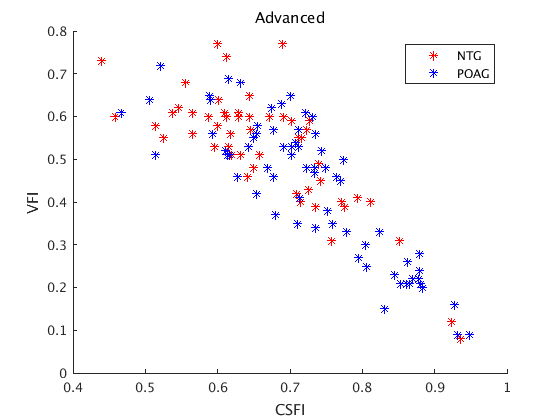

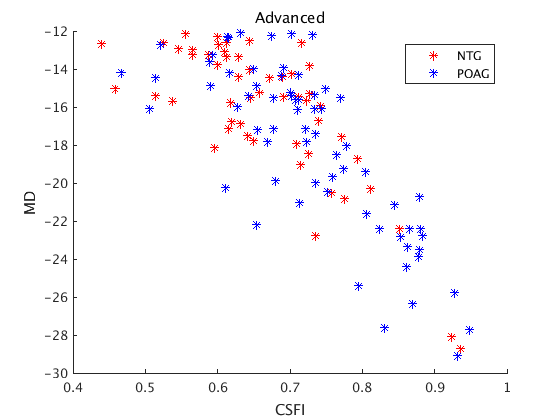

In [6]:
%% stage 3
inds = T2.MD30_2<-12 ; 
ninds = NTG.MD30_2<-12 ; 
pinds = POAG.MD30_2<-12 ; 

% MD
figure;hold on;

plot(NTG.CSFI(ninds), NTG.MD30_2(ninds),'*r')
plot(POAG.CSFI(pinds),POAG.MD30_2(pinds),'*b')

xlabel CSFI
ylabel MD
title Advanced
legend({'NTG','POAG'})

x = T2.CSFI(inds);
y = T2.MD30_2(inds);

mdl = fitlm(x,y)

[h,p] = corrcoef(x,y)


% VFI
y = T2.VFI(inds);

figure; hold on;
plot(NTG.CSFI(ninds), NTG.VFI(ninds),'*r')
plot(POAG.CSFI(pinds),POAG.VFI(pinds),'*b')

xlabel CSFI
ylabel VFI
title Advanced
legend({'NTG','POAG'})

%x = T2.CSFI(inds);
y = T2.VFI(inds);

mdl = fitlm(x,y)

[h,p] = corrcoef(x,y)

In [8]:
% linear regression
tbl = table(T2.CSFI,T2.age,T2.AL,T2.cpRNFL,T2.FixLoss_pcnt,T2.Gender,T2.VFI,T2.MD30_2,...
    'VariableNames',{'CSFI','age','AL','cpRNFL','Fix_Loss','Gender','VFI','MD'});

lm = fitlm(tbl,'CSFI ~ 1 + VFI + age + cpRNFL')

lm = fitlm(tbl,'CSFI ~ 1 + MD + age + cpRNFL')


lm = 


線形回帰モデル: 
    CSFI ~ 1 + age + cpRNFL + VFI

推定された係数: 
                    Estimate         SE         tStat       pValue   
                   __________    __________    _______    ___________

    (Intercept)        1.7253      0.027383     63.005    1.7692e-258
    age            -0.0019555    0.00029329    -6.6676     6.1696e-11
    cpRNFL          -0.008925     0.0003285    -27.169    8.7442e-105
    VFI              -0.71457      0.019613    -36.433    9.3667e-151


観測数: 572、誤差の自由度: 568
二乗平均平方根誤差: 0.0824
決定係数: 0.885、自由度調整済み決定係数 0.885
F 統計量と一定のモデルの比較: 1.46e+03、p 値は 9.74e-267 です

lm = 


線形回帰モデル: 
    CSFI ~ 1 + age + cpRNFL + MD

推定された係数: 
                    Estimate         SE         tStat       pValue   
                   __________    __________    _______    ___________

    (Intercept)       0.87692      0.029678     29.548     6.338e-117
    age            -0.0012593    0.00026248    -4.7976     2.0552e-06
    cpRNFL         -0.0080079    0.00030231    -26.489  

In [9]:
%% staging
inds = T2.MD30_2>-6; 
Early = T2(inds,:);

inds = T2.MD30_2<-6 & T2.MD30_2>=-12 ; 
Middle = T2(inds,:);

inds = T2.MD30_2<-12 ; 
End  = T2(inds,:);

In [10]:
%% Early
tbl = table(Early.CSFI,Early.age,Early.AL,Early.cpRNFL,Early.FixLoss_pcnt,...
    Early.Gender,Early.VFI,Early.MD30_2,...
    'VariableNames',{'CSFI','age','AL','cpRNFL','Fix_Loss','Gender','VFI','MD'});

lm = fitlm(tbl,'CSFI ~ 1 + VFI + age + cpRNFL')
% anova(lm,'summary')

lm = fitlm(tbl,'CSFI ~ 1 + MD + age + cpRNFL')


lm = 


線形回帰モデル: 
    CSFI ~ 1 + age + cpRNFL + VFI

推定された係数: 
                    Estimate         SE         tStat       pValue  
                   __________    __________    _______    __________

    (Intercept)        2.1276      0.077485     27.458    2.4554e-87
    age            -0.0025794    0.00033117    -7.7886     8.798e-14
    cpRNFL         -0.0098552    0.00037415     -26.34    3.1362e-83
    VFI               -1.0365      0.084816    -12.221    1.3406e-28


観測数: 335、誤差の自由度: 331
二乗平均平方根誤差: 0.0724
決定係数: 0.802、自由度調整済み決定係数 0.801
F 統計量と一定のモデルの比較: 448、p 値は 4.05e-116 です

lm = 


線形回帰モデル: 
    CSFI ~ 1 + age + cpRNFL + MD

推定された係数: 
                    Estimate         SE         tStat       pValue  
                   __________    __________    _______    __________

    (Intercept)       0.92476      0.033052     27.979    3.1735e-89
    age            -0.0014082    0.00027423    -5.1352    4.8201e-07
    cpRNFL         -0.0089219    0.00031201    -28.595     1.927e-91
  

In [11]:
%% Middle
tbl = table(Middle.CSFI,Middle.age,Middle.AL,Middle.cpRNFL,Middle.FixLoss_pcnt,...
    Middle.Gender,Middle.VFI,Middle.MD30_2,...
    'VariableNames',{'CSFI','age','AL','cpRNFL','Fix_Loss','Gender','VFI','MD'});

lm = fitlm(tbl,'CSFI ~ 1 + VFI + age + cpRNFL')
lm = fitlm(tbl,'CSFI ~ 1 + MD + age + cpRNFL')


lm = 


線形回帰モデル: 
    CSFI ~ 1 + age + cpRNFL + VFI

推定された係数: 
                    Estimate         SE         tStat       pValue  
                   __________    __________    _______    __________

    (Intercept)        1.1069        0.0649     17.055    3.7029e-33
    age            -0.0013245    0.00046888    -2.8248     0.0055866
    cpRNFL         -0.0056617    0.00056688    -9.9874    2.9721e-17
    VFI              -0.19104      0.060488    -3.1583     0.0020314


観測数: 118、誤差の自由度: 114
二乗平均平方根誤差: 0.0561
決定係数: 0.525、自由度調整済み決定係数 0.512
F 統計量と一定のモデルの比較: 42、p 値は 2.37e-18 です

lm = 


線形回帰モデル: 
    CSFI ~ 1 + age + cpRNFL + MD

推定された係数: 
                    Estimate         SE         tStat       pValue  
                   __________    __________    _______    __________

    (Intercept)       0.81586      0.054122     15.074     6.586e-29
    age            -0.0013292    0.00043768    -3.0369     0.0029631
    cpRNFL         -0.0054024    0.00053397    -10.117    1.4771e-17
    

In [12]:
%% Advanced
tbl = table(End.CSFI,End.age,End.AL,End.cpRNFL,End.FixLoss_pcnt,...
    End.Gender,End.VFI,End.MD30_2,...
    'VariableNames',{'CSFI','age','AL','cpRNFL','Fix_Loss','Gender','VFI','MD'});

lm = fitlm(tbl,'CSFI ~ 1 + VFI + age + cpRNFL')
lm = fitlm(tbl,'CSFI ~ 1 + MD + age + cpRNFL')


lm = 


線形回帰モデル: 
    CSFI ~ 1 + age + cpRNFL + VFI

推定された係数: 
                    Estimate         SE         tStat       pValue  
                   __________    __________    _______    __________

    (Intercept)        1.1753      0.046132     25.476    4.1359e-49
    age            -0.0013408    0.00044239    -3.0307     0.0030141
    cpRNFL           -0.00191    0.00059956    -3.1857      0.001859
    VFI               -0.5793      0.032951    -17.581    2.2362e-34


観測数: 119、誤差の自由度: 115
二乗平均平方根誤差: 0.0564
決定係数: 0.745、自由度調整済み決定係数 0.738
F 統計量と一定のモデルの比較: 112、p 値は 5.47e-34 です

lm = 


線形回帰モデル: 
    CSFI ~ 1 + age + cpRNFL + MD

推定された係数: 
                    Estimate          SE         tStat       pValue  
                   ___________    __________    _______    __________

    (Intercept)        0.47403      0.061205     7.7449    4.1121e-12
    age            -0.00062736    0.00052257    -1.2005        0.2324
    cpRNFL          -0.0013726     0.0007181    -1.9114      0.05844